In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.optimize import minimize

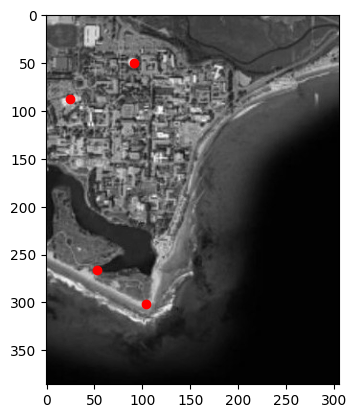

In [2]:
img_1 = plt.imread("webreg_0.jpg")
img_gray_1 = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray_1, cmap="gray")

reg_1 = np.array([(91, 50), (53, 266), (104, 302), (24, 88)])
plt.scatter(reg_1[:, 0], reg_1[:, 1], c="red")

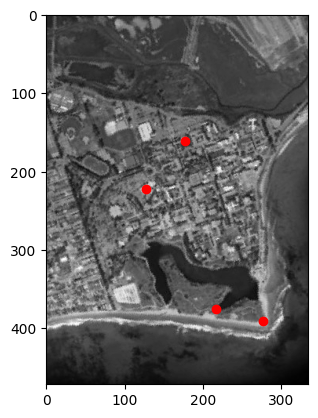

In [3]:
img_2 = plt.imread("webreg_1.jpg")
img_gray_2 = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray_2, cmap="gray")

reg_2 = np.array([(177, 161), (217, 376), (276, 391), (127, 222)])
plt.scatter(reg_2[:, 0], reg_2[:, 1], c="red")

In [4]:
a = np.concatenate((reg_1, np.ones(reg_1.shape[0]).reshape(-1, 1)), axis=1)
b = np.concatenate((reg_2, np.ones(reg_1.shape[0]).reshape(-1, 1)), axis=1)

def error_function(x):
    a11, a12, a13,  a21, a22, a23 = x
    affine_trans = np.array([
        [a11, a12, a13],
        [a21, a22, a23],
        [0, 0,  1]
    ])
    ls = ((np.dot(affine_trans, a.T) - b.T)**2).sum()
    return ls

In [5]:
res = minimize(error_function, np.ones(6))

In [6]:
res_trans = res.x.reshape((2, 3))

In [7]:
img_1_trans = cv.warpAffine(img_gray_1, res_trans, dsize=np.array(img_gray_1.shape) * 2)

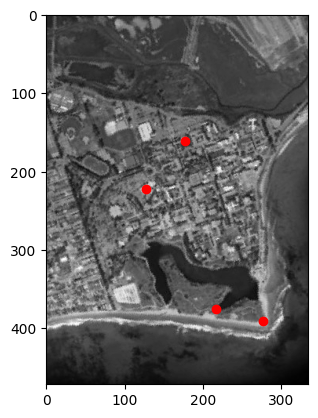

In [8]:
plt.imshow(img_gray_2, cmap="gray")
plt.scatter(reg_2[:, 0], reg_2[:, 1], c="red")

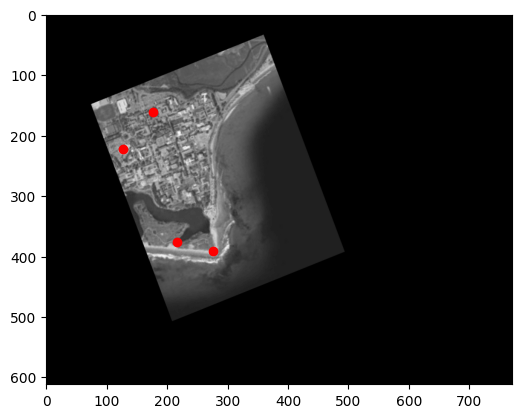

In [9]:
plt.imshow(img_1_trans, cmap="gray")
plt.scatter(reg_2[:, 0], reg_2[:, 1], c="red")